<a href="https://colab.research.google.com/github/cpatil01/DAA-/blob/main/mlAssi1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'C:\Users\cheta\Dropbox\PC\Downloads\uber.csv')
df.head()

FileNotFoundError: ignored

In [ ]:
df.shape

(200000, 9)

In [ ]:
df.shape

(200000, 9)

In [ ]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [ ]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
df.pickup_datetime=pd.to_datetime(df.pickup_datetime,errors='coerce')

NameError: ignored

In [ ]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [ ]:
df=df.drop(['Unnamed: 0','key'],axis=1)

NameError: ignored

In [ ]:
df=df.assign(hour=df.pickup_datetime.dt.hour,
            day=df.pickup_datetime.dt.day,
            month=df.pickup_datetime.dt.month,
            year=df.pickup_datetime.dt.year)

In [ ]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014


fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dtype: object

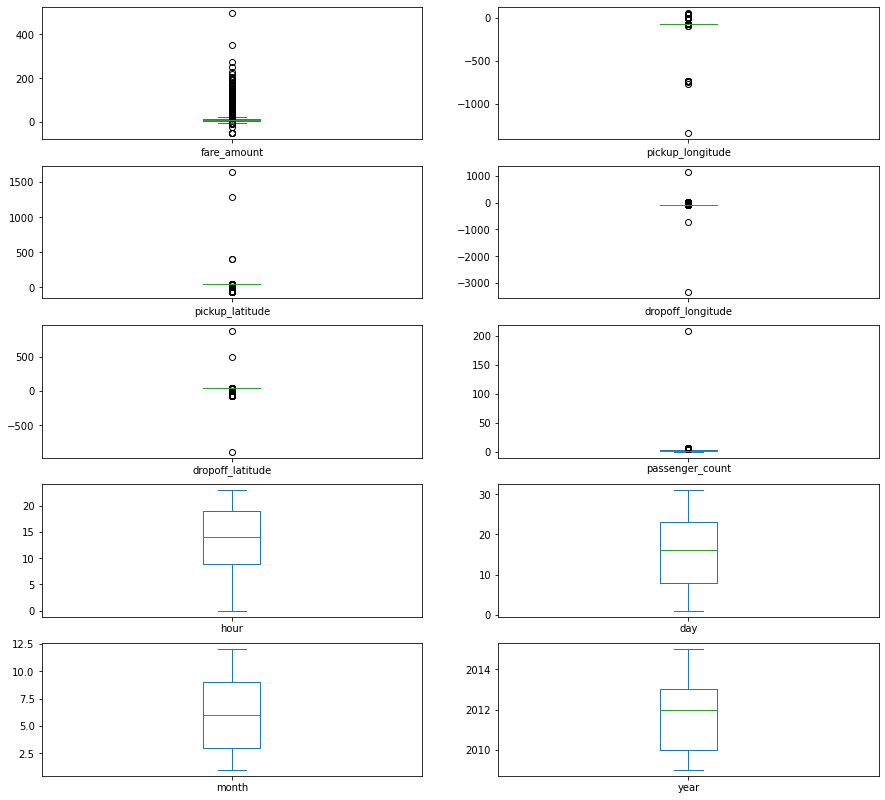

In [ ]:
df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20))

In [ ]:
def remove_outlier(df1,col):
    Q1=df1[col].quantile(0.25)
    Q3=df1[col].quantile(0.75)
    IQR=Q3-Q1
    lower_whisker=Q1-1.5*IQR
    upper_whisker=Q3-1.5*IQR
    df[col]=np.clip(df1[col],lower_whisker,upper_whisker)
    return df1
def treat(df1,col_list):
    for c in col_list:
        df1=remove_outlier(df,c)
    return df1

In [ ]:
df=treat(df,df.iloc[:,0:])

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dtype: object

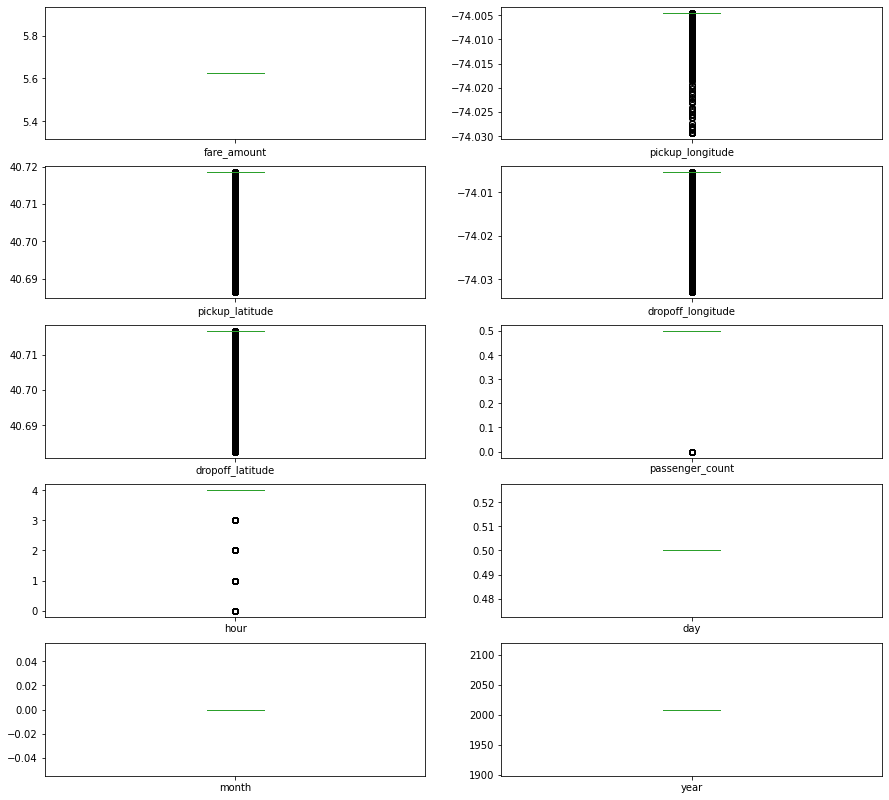

In [ ]:
df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20))

In [ ]:
import haversine as hs

In [ ]:
travel_dist=[]
for pos in range(len(df['pickup_longitude'])):
    long1,lati1,long2,lati2=[df['pickup_longitude'][pos],df['pickup_latitude'][pos],df['dropoff_longitude'][pos],df['dropoff_latitude'][pos]]
    loc1=(lati1,long1)
    loc2=(lati2,long2)
    c=hs.haversine(loc1,loc2)
    travel_dist.append(c)
print(travel_dist)
df['travel_dist_km']=travel_dist
df.head()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,travel_dist_km
0,5.625,2009-01-26 23:23:15.750000+00:00,-74.004521,40.718615,-74.005281,40.716734,0.5,4.0,0.5,0.0,2008.5,0.218732
1,5.625,2009-01-26 23:23:15.750000+00:00,-74.004521,40.718615,-74.005281,40.716734,0.5,4.0,0.5,0.0,2008.5,0.218732
2,5.625,2009-01-26 23:23:15.750000+00:00,-74.005043,40.718615,-74.005281,40.716734,0.5,4.0,0.5,0.0,2008.5,0.210088
3,5.625,2009-01-26 23:23:15.750000+00:00,-74.004521,40.718615,-74.005281,40.716734,0.5,4.0,0.5,0.0,2008.5,0.218732
4,5.625,2009-01-26 23:23:15.750000+00:00,-74.004521,40.718615,-74.005281,40.716734,0.5,4.0,0.5,0.0,2008.5,0.218732


In [ ]:
df=df.loc[(df.travel_dist_km>=1) | (df.travel_dist_km<=130)]

In [ ]:
incorrect_coordinates=df.loc[(df.pickup_latitude > 90)  |(df.pickup_latitude<-90)  |
                             (df.pickup_longitude > 90) |(df.pickup_longitude<-90)  |
                             (df.dropoff_longitude>90)  |(df.dropoff_longitude<-90)|
                             (df.dropoff_latitude>90 )  |(df.dropoff_latitude<-90)]

In [ ]:
df.drop(incorrect_coordinates,inplace=True,errors='ignore')
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,travel_dist_km
0,5.625,2009-01-26 23:23:15.750000+00:00,-74.004521,40.718615,-74.005281,40.716734,0.5,4.0,0.5,0.0,2008.5,0.218732
1,5.625,2009-01-26 23:23:15.750000+00:00,-74.004521,40.718615,-74.005281,40.716734,0.5,4.0,0.5,0.0,2008.5,0.218732
2,5.625,2009-01-26 23:23:15.750000+00:00,-74.005043,40.718615,-74.005281,40.716734,0.5,4.0,0.5,0.0,2008.5,0.210088
3,5.625,2009-01-26 23:23:15.750000+00:00,-74.004521,40.718615,-74.005281,40.716734,0.5,4.0,0.5,0.0,2008.5,0.218732
4,5.625,2009-01-26 23:23:15.750000+00:00,-74.004521,40.718615,-74.005281,40.716734,0.5,4.0,0.5,0.0,2008.5,0.218732


<AxesSubplot:>

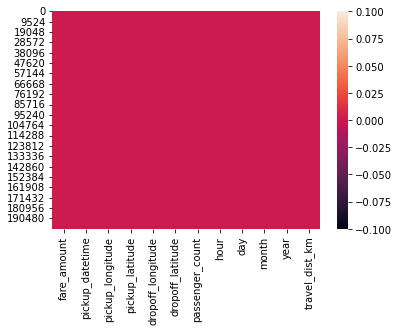

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
corr=df.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,travel_dist_km
fare_amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickup_longitude,NaN,1.000000,0.125837,0.274785,0.025273,-0.002128,-0.004913,NaN,NaN,NaN,-0.121375
pickup_latitude,NaN,0.125837,1.000000,0.029093,0.530161,0.002136,0.011831,NaN,NaN,NaN,-0.342350
dropoff_longitude,NaN,0.274785,0.029093,1.000000,0.158657,-0.003388,0.002003,NaN,NaN,NaN,-0.256904
dropoff_latitude,NaN,0.025273,0.530161,0.158657,1.000000,0.000046,0.057192,NaN,NaN,NaN,-0.596957
passenger_count,NaN,-0.002128,0.002136,-0.003388,0.000046,1.000000,-0.000261,NaN,NaN,NaN,0.002259
hour,NaN,-0.004913,0.011831,0.002003,0.057192,-0.000261,1.000000,NaN,NaN,NaN,-0.046169
day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

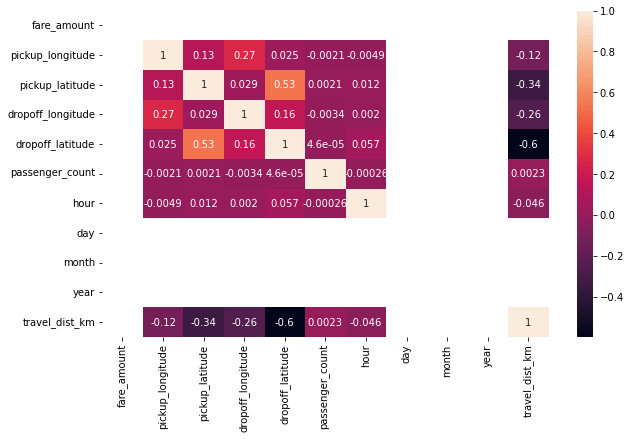

In [ ]:
fig,axis=plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [ ]:
x=df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]
y=df[['fare_amount']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [ ]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
prediction=regression.predict(x_test)
prediction

array([[5.625],
       [5.625],
       [5.625],
       ...,
       [5.625],
       [5.625],
       [5.625]])

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,prediction)

1.0

In [ ]:
mse=mean_squared_error(y_test,prediction)

In [ ]:
mse

0.0

In [ ]:
rmse=np.sqrt(mse)

In [ ]:
rmse

0.0

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)

C:\Users\Home\AppData\Local\Temp\ipykernel_6724\1941013405.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestRegressor()

In [ ]:
y_predict=rf.predict(x_test)
y_predict

array([5.625, 5.625, 5.625, ..., 5.625, 5.625, 5.625])

In [ ]:
R2_random=r2_score(y_test,y_predict)
R2_random

1.0

In [ ]:
mse_randome=mean_squared_error(y_test,y_predict)
mse

0.0

In [ ]:
rmse=np.sqrt(mse)

In [ ]:
rmse

0.0